In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
punteggi = pd.read_csv("punteggi.csv", index_col=0)
indicatori = pd.read_csv("indicatori.csv", index_col=0)
popolazione = pd.read_csv("aggregazioni_popolazione.csv", index_col=0)
province = pd.read_csv("province.csv", index_col=3)

In [12]:
display(punteggi.head(3))
display(indicatori.head(3))

,Amministratori comunali con meno di 40 anni,Anni di studio,Aree protette,Arrivi turistici,Assorbimento del settore residenziale,Cessazioni,Comuni con servizi per le famiglie interamente online,Comuni: capacità di riscossione,Copertura della rete fissa di accesso ultra veloce a internet,Danneggiamenti,...,Startup innovative,Tasso di disoccupazione giovanile,Tasso di infortuni sul lavoro mortali e con inabilità permanente,Tasso di mancata partecipazione al lavoro,Tasso di motorizzazione,Tasso di occupazione,Trend del pil pro capite,Truffe e frodi informatiche,Uscita precoce dal sistema di istruzione e formazione,Valore aggiunto per abitante
PROVINCIA,,,,,,,,,,,,,,,,,,,,,
Agrigento,38.6,10.54,8.9,3.067518,75.0,3.959703,27.0,69.8,36.2,303.1,...,1.96,37.004910,13.0,29.8,79.0,50.7,4.347826,333.3,33.184080,21.6
Alessandria,18.8,10.93,11.1,-1.501014,74.9,5.302991,31.6,73.8,49.0,513.0,...,2.56,21.657233,11.7,7.1,66.0,73.9,2.564103,478.3,27.083689,36.0
Ancona,22.1,11.60,11.9,9.409472,67.4,5.394640,48.9,76.1,64.6,308.0,...,7.86,30.879327,16.7,9.3,64.0,71.5,2.506964,446.0,20.825383,36.8


,UNITA_MISURA,ANNO_RIFERIMENTO,FONTE
INDICATORE,,,
Valore aggiunto per abitante,Migliaia di euro a valori correnti,Stima sul 2025,Prometeia
Trend del pil pro capite,Var % annua,Stima 2025 / 2024,elab. su dati Prometeia
Depositi bancari delle famiglie consumatrici,In migliaia euro pro capite,Al 31 luglio 2025,Banca d'italia


In [13]:
province = popolazione.join(province)

In [14]:
display(province.head(3))

,REGIONE,MACROREGIONE,MEGAREGIONE,POPOLAZIONE,NOME_ISTAT,COD_NUTS,COD_ISTAT
PROVINCIA,,,,,,,
Milano,Lombardia,Nord-ovest,Nord,3247623,Milano,ITC4C,15
Bolzano,Trentino Alto Adige,Nord-est,Nord,539386,Bolzano/Bozen,ITH10,21
Bologna,Emilia-Romagna,Nord-est,Nord,1020865,Bologna,ITH55,37


In [15]:
df = punteggi.copy(deep=True)

In [16]:
plt.style.use('ggplot')

In [17]:

citta_lombardia = ['Brescia', 'Bergamo', 'Milano', 'Como', 'Cremona', 'Monza e Brianza', 'Lodi', 'Mantova', 'Cremona', 'Sondrio', 'Lecco', 'Pavia', 'Varese']
citta_grandi = ['Firenze', 'Torino', 'Roma', 'Bologna', 'Napoli', 'Verona', 'Padova', 'Catania']

capoluoghi = ['Aosta', 'Genova', 'Trento', 'Venezia', 'Trieste', 'Firenze', 'Perugia', 'Torino', "L'Aquila"
              'Ancona' 'Roma', 'Bologna', 'Napoli', 'Catania', 'Campobasso', 'Potenza', 'Catanzaro', 'Palermo', 'Cagliari']


altre_citta = ['Verona', 'Padova', 'Catania', 'Bolzano', 'Trento']
for c in citta_lombardia + altre_citta:
    if c not in df.index:
        print(c)

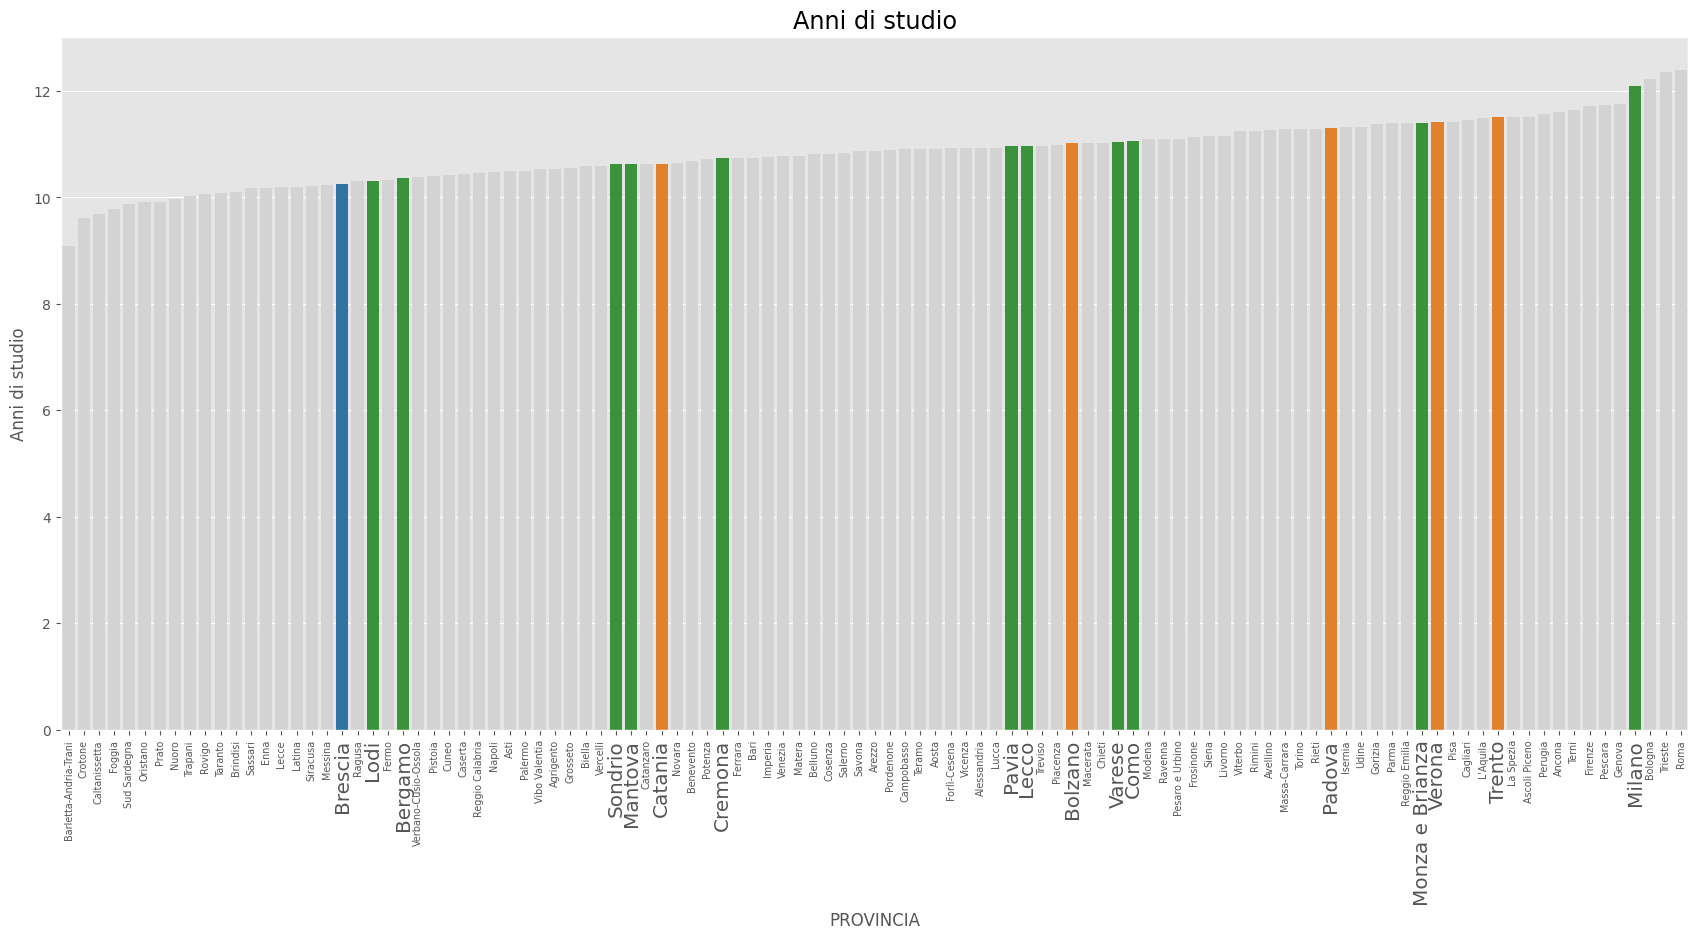

In [18]:
indicatore = 'Anni di studio'
figsize = 1 * np.array((21, 9))
df = df.sort_values(by=indicatore)
colors = []
for city in df.index:
    if city in citta_lombardia:
        color = "tab:green"   # colore per città lombarde
    elif city in altre_citta:
        color = "tab:orange" # colore per altre città
    else:
        color = "lightgray"  # colore default
    if city == 'Brescia':
        color = "tab:blue"
    colors.append(color)


fig, ax = plt.subplots(1, 1, figsize=figsize)

sns.barplot(data=df, y=indicatore, x=df.index, ax=ax, palette=colors, hue=df.index, legend=False)
ax.set_title(indicatore, size='xx-large')
for label in ax.get_xticklabels():
    label.set_rotation(90)
    if label.get_text() in citta_lombardia + altre_citta:
        label.set_fontsize('x-large')
    else:
        label.set_fontsize('x-small')